# Organize demographic data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for stat of demographic
import pingouin as pg

/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
dm = pd.read_csv('data/demographic.csv')

dfAll = pd.read_csv('data/scr_clean2.csv')

In [12]:
# find were same subject occur
both = set(dfAll['sub'].unique()).intersection(dm['sub_id'].unique()) 
len(both)

65

In [13]:
# grab demographic only of those in both
dm_clean = dm[dm['sub_id'].isin(both)]
dm_clean.head()

,sub_id,group,Gender,Age
0,sub-010,VCC,2.0,29.0
1,sub-016,VCC,1.0,25.0
3,sub-026,VPTSD,1.0,32.0
4,sub-027,VCC,1.0,35.0
5,sub-030,VPTSD,1.0,44.0


In [14]:
len(dm_clean['sub_id'])

65

In [15]:
dm_clean.describe()

,Gender,Age
count,65.000000,65.000000
mean,1.184615,30.353846
std,0.391005,7.657575
min,1.000000,18.000000
25%,1.000000,25.000000
50%,1.000000,29.000000
75%,1.000000,34.000000
max,2.000000,51.000000


In [17]:
dm_clean.groupby(['group','Gender']).describe()

Age                                                     
             count       mean       std   min    25%   50%    75%   max
group Gender                                                           
HC    1.0     12.0  23.750000  3.250874  18.0  21.75  24.0  26.25  29.0
      2.0      7.0  26.428571  4.503967  21.0  24.00  25.0  28.50  34.0
VCC   1.0     23.0  32.434783  7.328810  24.0  27.00  30.0  38.00  46.0
      2.0      2.0  26.000000  4.242641  23.0  24.50  26.0  27.50  29.0
VPTSD 1.0     18.0  32.944444  8.591872  21.0  27.50  30.5  35.00  51.0
      2.0      3.0  37.333333  3.511885  34.0  35.50  37.0  39.00  41.0

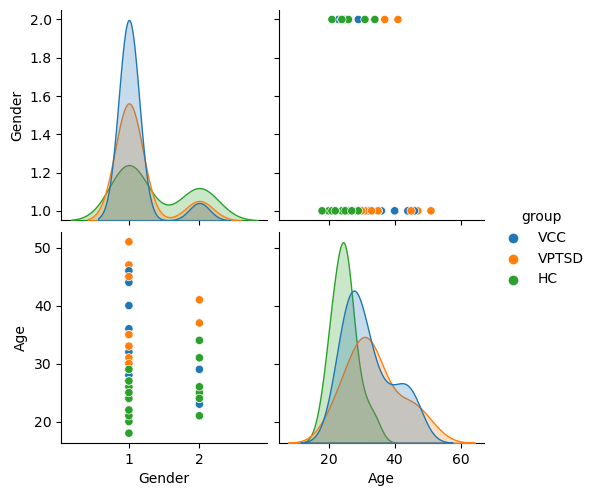

In [18]:
sns.pairplot(dm_clean, hue='group')

In [19]:
pg.ttest(dm_clean['Age'][dm_clean['group']=='VPTSD'], dm_clean['Age'][dm_clean['group']=='HC'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.443377,29.194759,two-sided,0.000117,"[4.77, 12.9]",1.362001,279.363,0.987148


In [20]:
pg.anova(data=dm_clean, dv='Age', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,62,9.470324,0.000258,0.234007


Indeed age is significantly different between healthy controls and PTSD/CC groups

In [21]:
pg.chi2_independence(dm_clean, 'group', 'Gender')

/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


(Gender        1.0       2.0
 group                      
 HC      15.492308  3.507692
 VCC     20.384615  4.615385
 VPTSD   17.123077  3.876923,
 Gender  1.0  2.0
 group           
 HC       12    7
 VCC      23    2
 VPTSD    18    3,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  6.325105  2.0  0.042318  0.311944  0.608265
 1        cressie-read  0.666667  6.169202  2.0  0.045748  0.308076  0.596769
 2      log-likelihood  0.000000  6.010109  2.0  0.049536  0.304078  0.584808
 3       freeman-tukey -0.500000  6.019920  2.0  0.049294  0.304326  0.585552
 4  mod-log-likelihood -1.000000  6.143032  2.0  0.046351  0.307422  0.594817
 5              neyman -2.000000  6.775240  2.0  0.033789  0.322854  0.640199)

In [22]:
pg.chi2_independence(dm_clean[dm_clean['group']!='HC'], 'group', 'Gender')

/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


(Gender        1.0       2.0
 group                      
 VCC     22.282609  2.717391
 VPTSD   18.717391  2.282609,
 Gender   1.0  2.0
 group            
 VCC     22.5  2.5
 VPTSD   18.5  2.5,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  0.042741  1.0  0.836214  0.030482  0.054910
 1        cressie-read  0.666667  0.042688  1.0  0.836313  0.030463  0.054904
 2      log-likelihood  0.000000  0.042600  1.0  0.836481  0.030432  0.054894
 3       freeman-tukey -0.500000  0.042547  1.0  0.836580  0.030413  0.054888
 4  mod-log-likelihood -1.000000  0.042507  1.0  0.836657  0.030398  0.054883
 5              neyman -2.000000  0.042462  1.0  0.836741  0.030382  0.054878)

Gender also divides differently in HC group